## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 1.47232784,  0.15964792],
       [-0.24100617,  0.86711477],
       [ 0.14493315,  0.90722105],
       ...,
       [ 0.04172615, -0.75756737],
       [-0.87752924,  1.12620929],
       [-1.02823537,  0.4428784 ]])

In [6]:
y

array([ 1.37269526e+02, -1.61583006e+00,  3.85363411e+01, -1.51010925e+01,
       -7.68880670e+01,  8.46455852e+01,  1.38773135e+02, -1.80619700e+02,
        5.69518118e+01,  8.09386776e+00, -4.99245017e+01, -8.07566766e+01,
       -1.52571546e+02,  7.16888927e+00,  1.37995804e+01, -5.60887803e+01,
       -5.89381235e+01, -5.98506207e+01, -2.54135313e+01, -1.58129819e+02,
       -4.22060034e+01, -4.41889363e+01,  1.26360839e+02,  1.86453982e+02,
        3.65138623e+01, -1.50788383e+01, -8.29782101e+01, -1.42549697e+02,
       -4.29667365e+01, -2.88380878e+01, -1.94892528e+01, -1.20907495e+02,
        1.82700516e+01, -1.85190874e+01,  3.02884566e+01,  6.04778643e+01,
       -1.99679354e+02, -9.84590892e+01, -1.32834713e+02,  1.36256629e+02,
        5.31964353e+01, -1.82242197e+02,  1.03224924e+02, -5.30814375e+01,
        6.31072982e+01,  3.00373294e+01,  1.04466085e+02,  1.75822902e+01,
        4.25899826e+01, -4.22090611e+01, -6.10524886e+01,  1.80879141e+02,
       -1.56498637e+02,  

In [7]:
pd.DataFrame(X)[0]

0      1.472328
1     -0.241006
2      0.144933
3     -0.191993
4     -0.557236
         ...   
995    0.083577
996    0.932708
997    0.041726
998   -0.877529
999   -1.028235
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

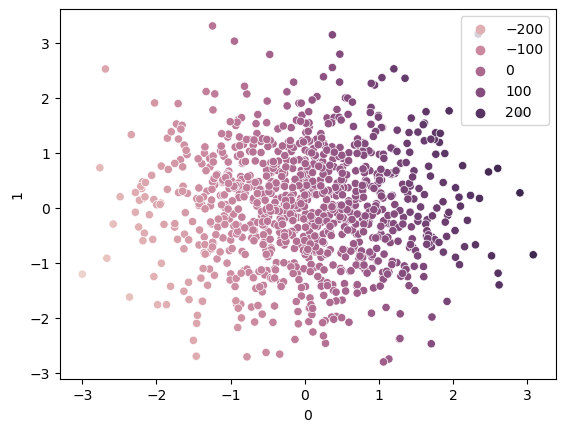

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr = SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[86.56793328, 22.25574897]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_pred,y_test))

0.9989731910768491


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.779 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.768 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.781 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.779 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.768 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.781 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9990251958608335
